# Heart Disease Prediction using Machine Learning

#### Overview

* we will be closely working with the heart disease prediction and for that, we will be looking into the heart disease dataset from that dataset we will derive various insights that help us know the weightage of each feature and how they are interrelated to each other but this time our sole aim is to detect the probability of person that will be affected by a savior heart problem or not.

#### Takeaways

The Heart Disease prediction will have the following key takeaways:

* Data insight: As mentioned here we will be working with the heart disease detection dataset and we will be putting out   interesting inferences from the data to derive some meaningful results.

* EDA: Exploratory data analysis is the key step for getting meaningful results.

* Feature engineering: After getting the insights from the data we have to alter the features so that they can move forward for the model building phase.

* Model building: In this phase, we will be building our Machine learning model for heart disease detection.

## Importing Necessary Libraries

In [1]:
#Plotting Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

#Metrics for Classification technique

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Scaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

#Model building

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
data_types = data.dtypes
print(data_types)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

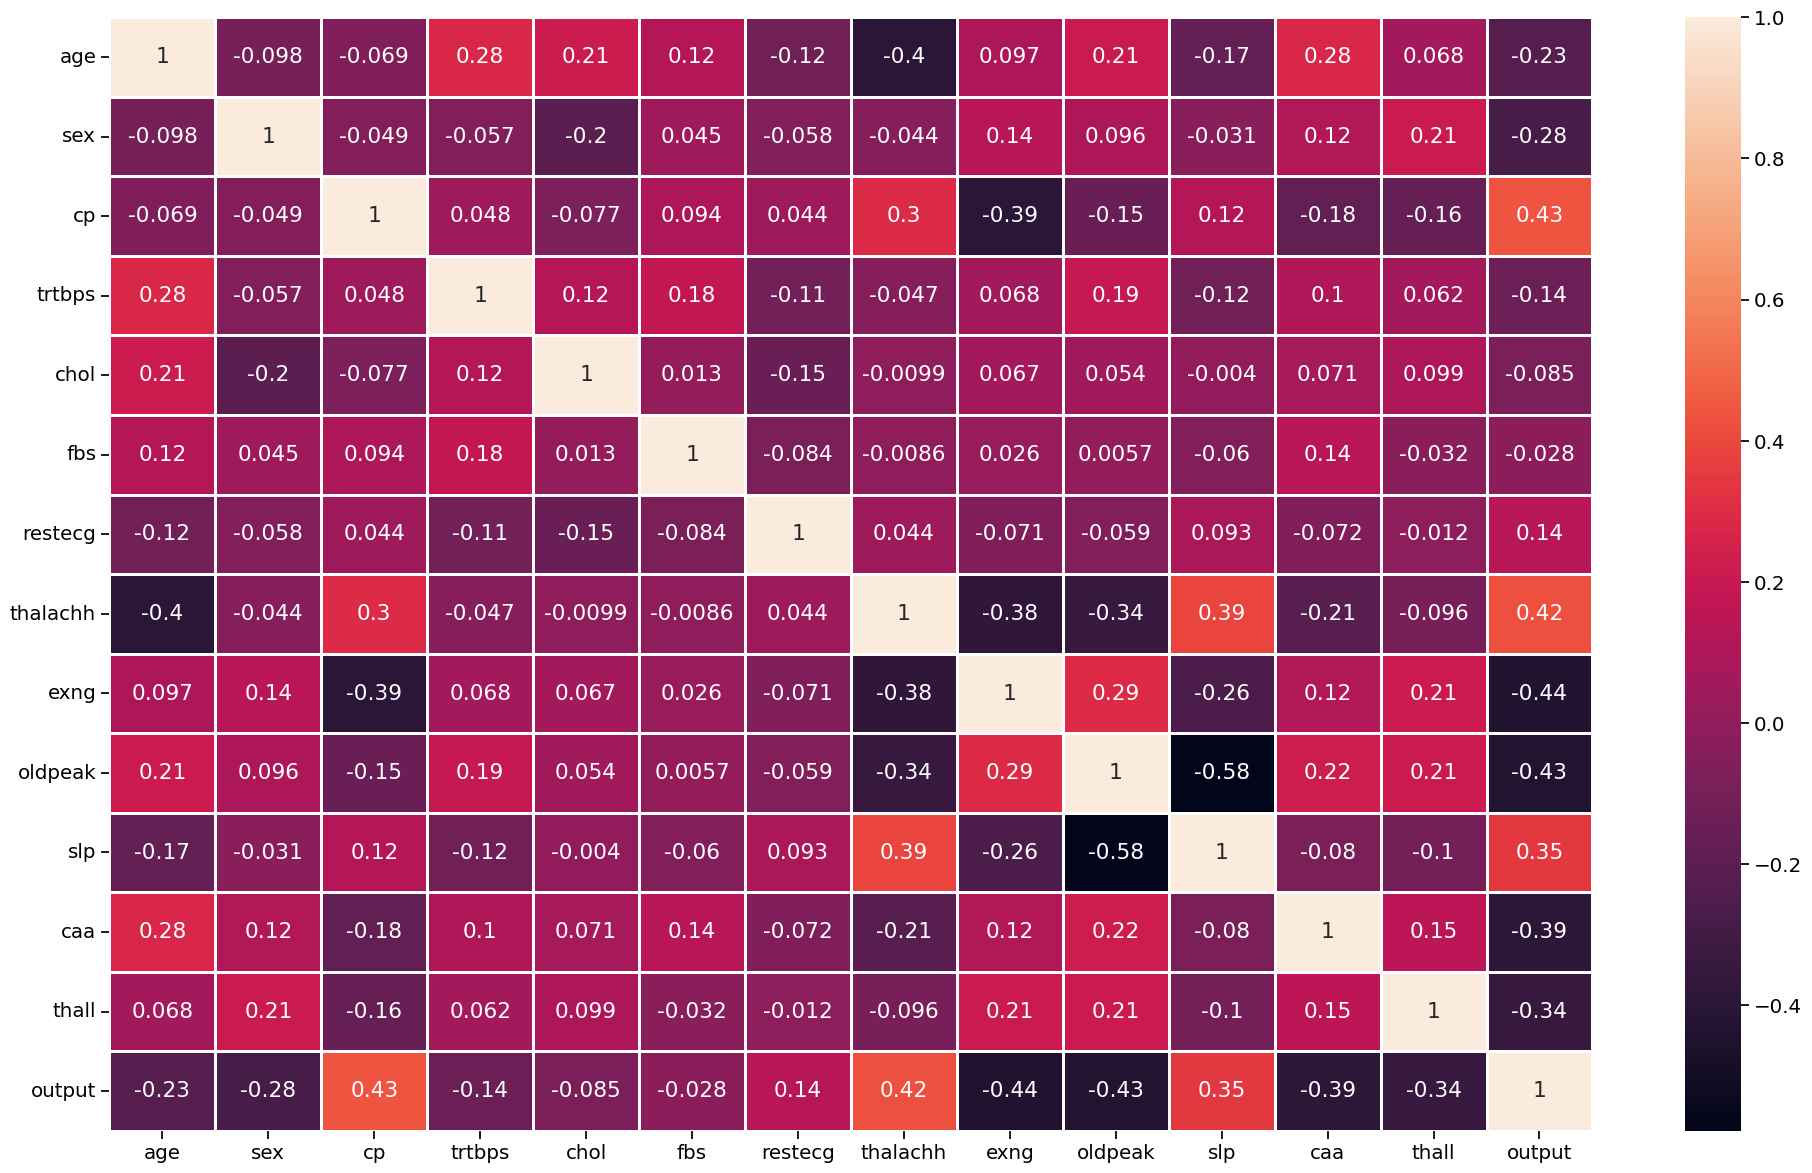

In [8]:
plt.figure(figsize=(20,12)) 
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2) 
plt.tight_layout()

By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

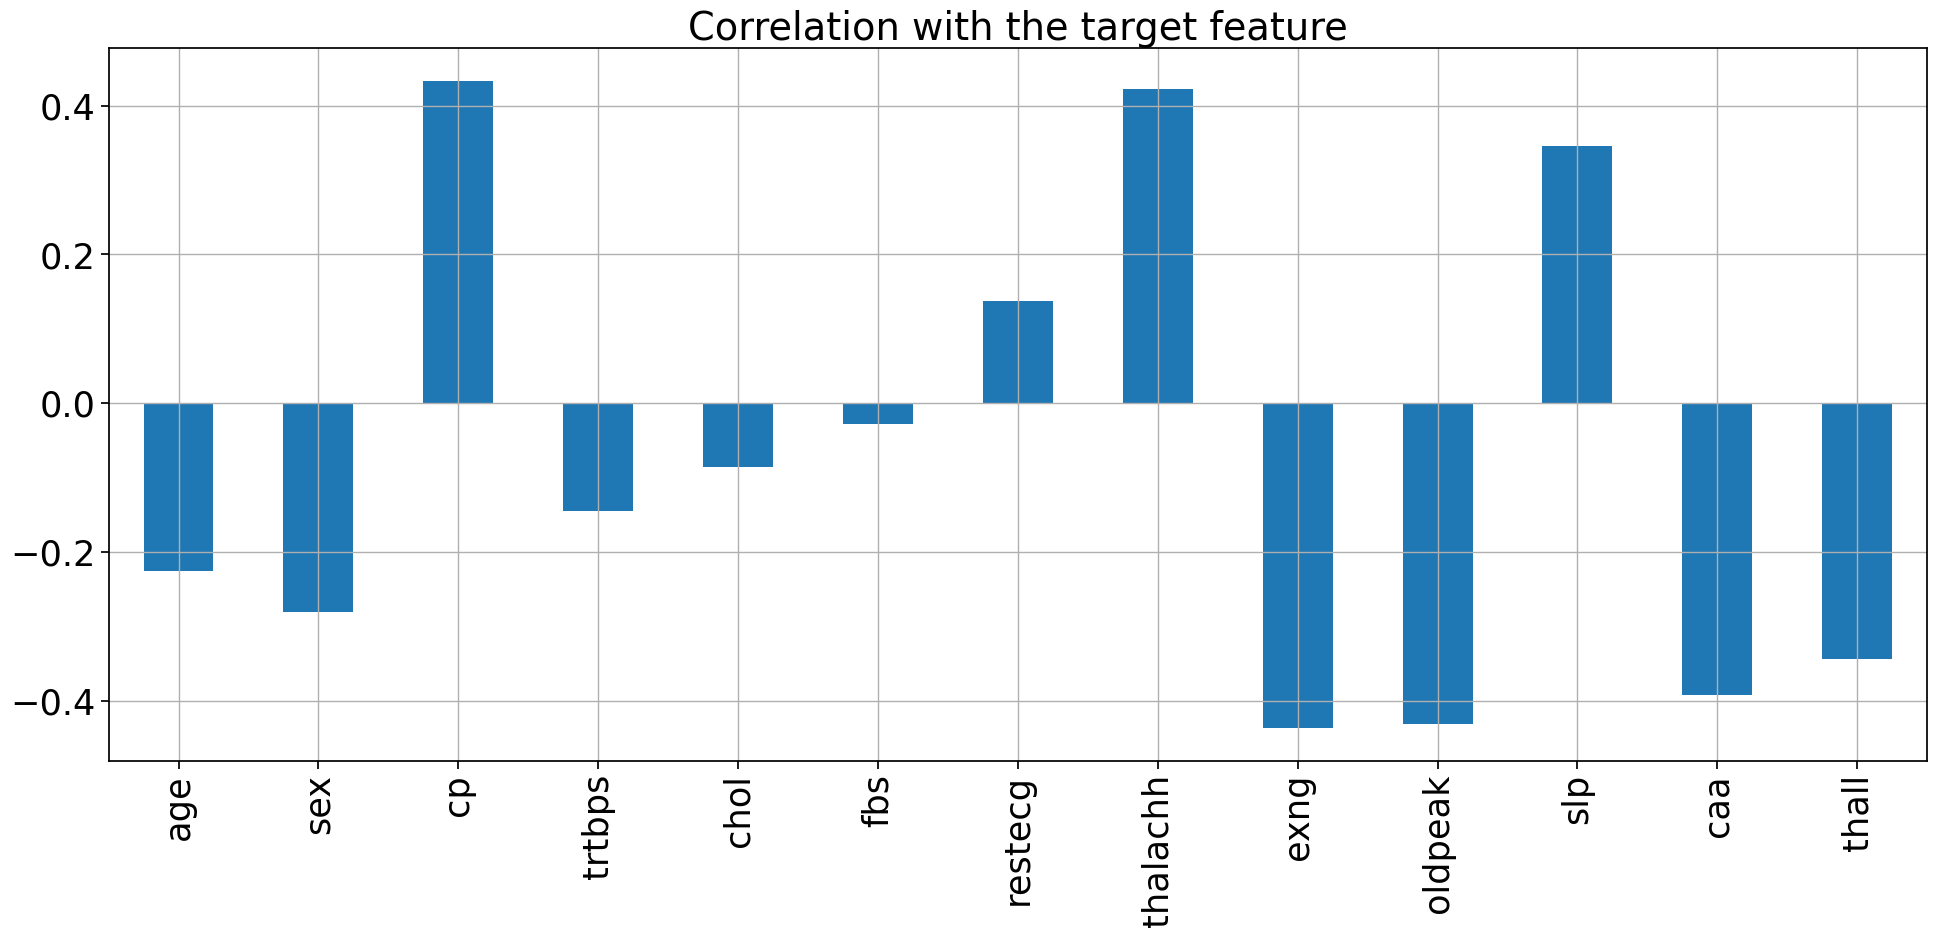

In [9]:
sns.set_context('notebook',font_scale = 2.3) 
data.drop('output',axis=1).corrwith(data.output).plot(kind='bar', grid=True, figsize=(20, 10),
title="Correlation with the target feature") 
plt.tight_layout()

#### Inference: Insights from the above graph are:

* Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
* Other features are negatively correlated with the target feature.

* So, we have done enough collective analysis now let’s go for the analysis of the individual features which 
comprises both univariate and bivariate analysis.

### Age Analysis

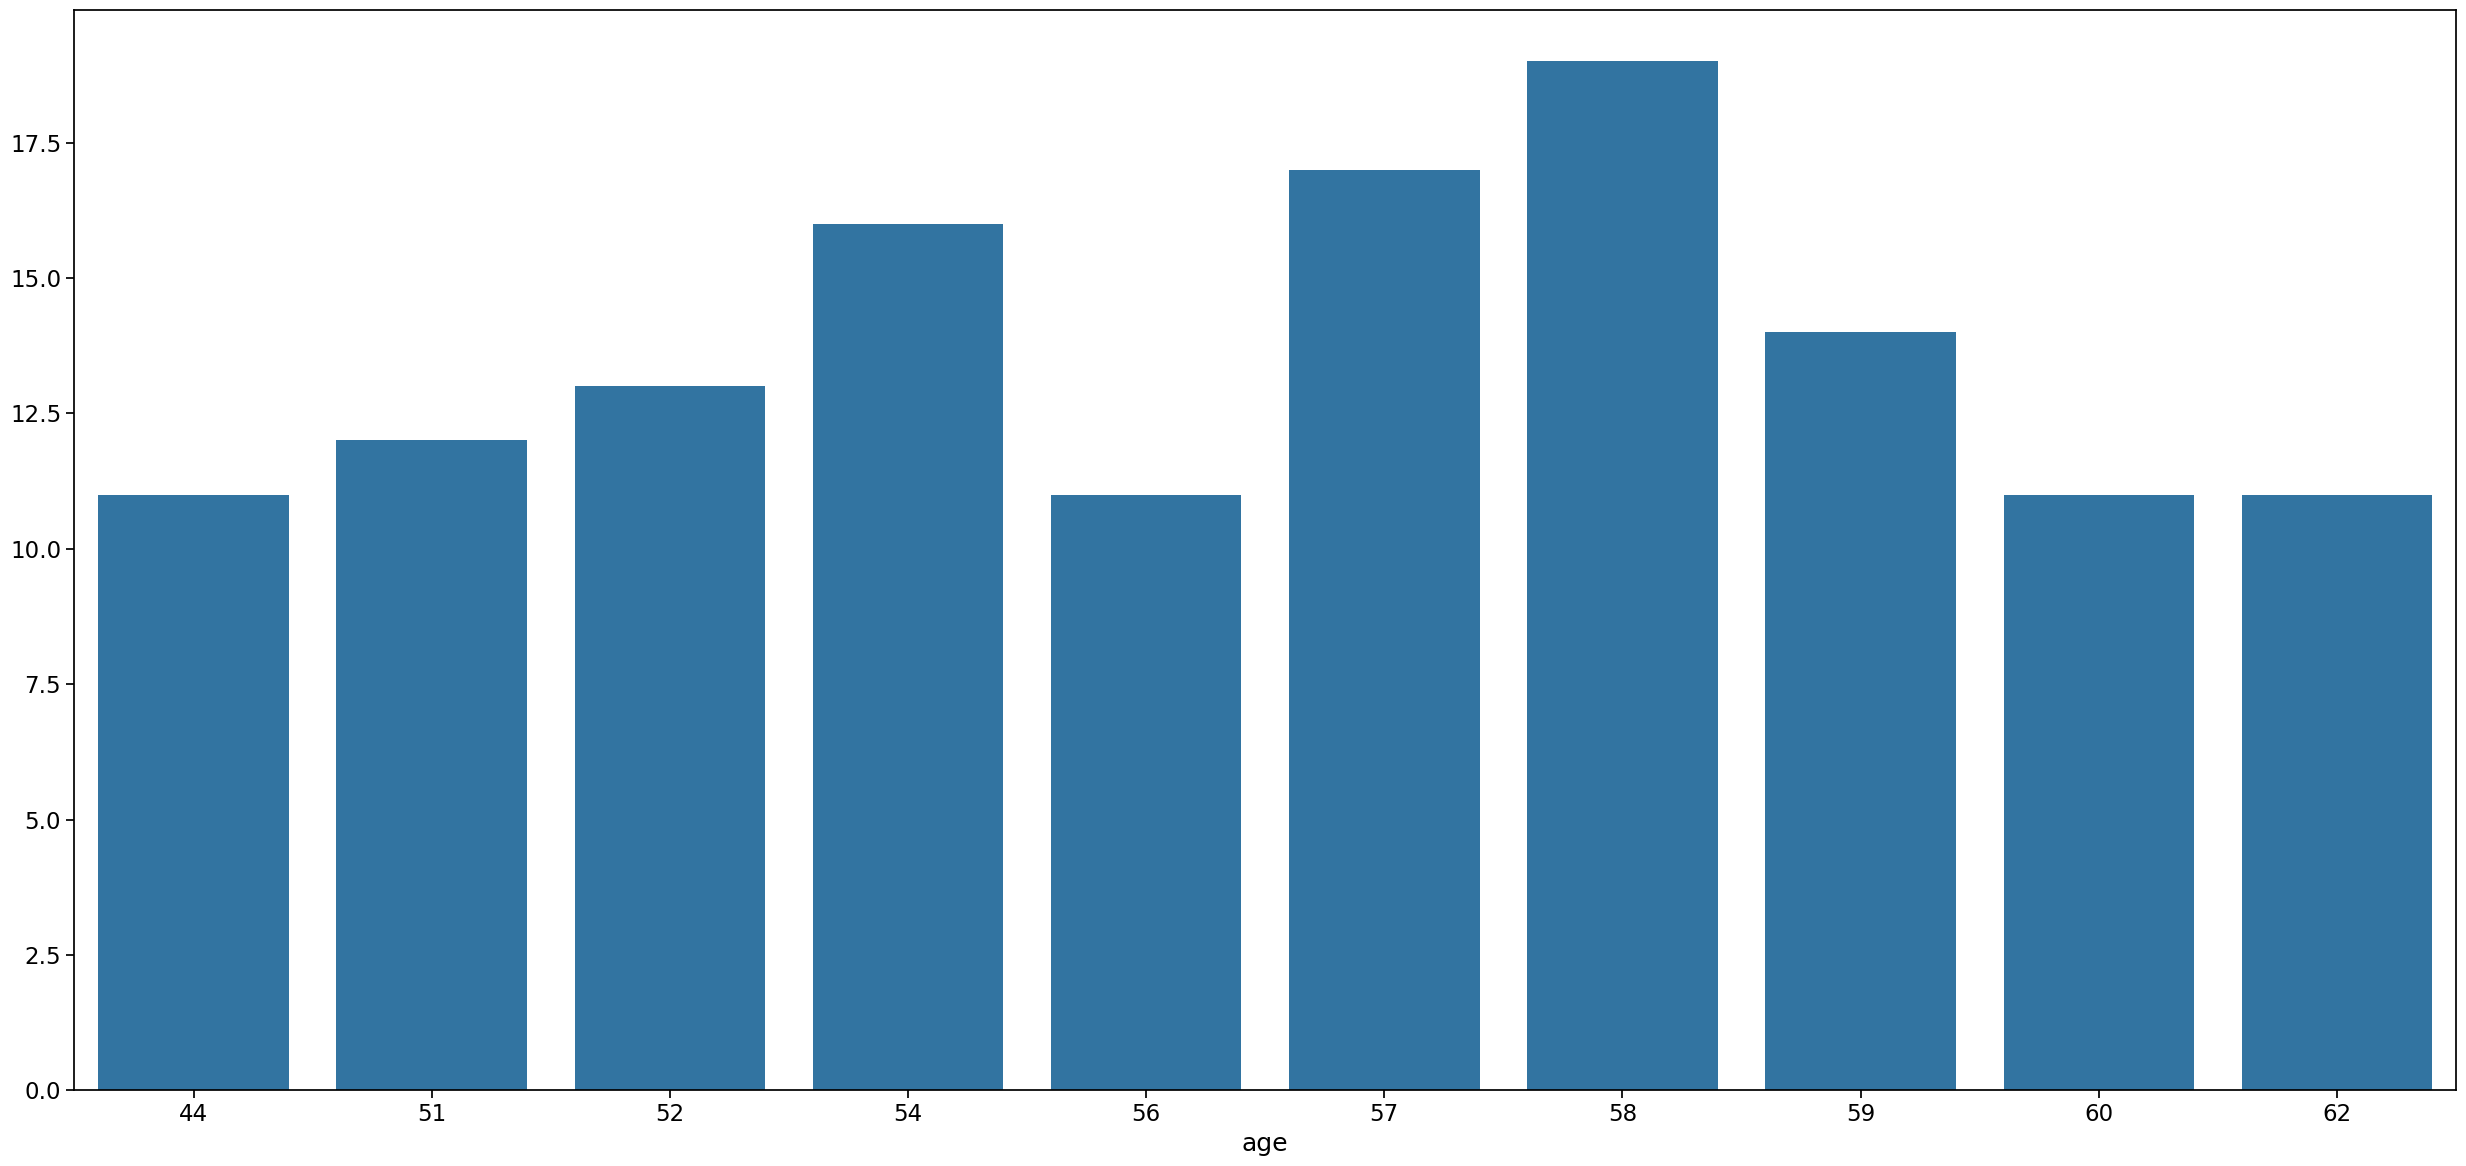

In [10]:
#Here we will be checking the 10 ages and their counts.

plt.figure(figsize=(25,12)) 
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values) 
plt.tight_layout()

#### Inference:  Here we can see that the 58 age column has the highest frequency.

In [11]:
#Let’s check the range of age in the dataset.
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


### We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

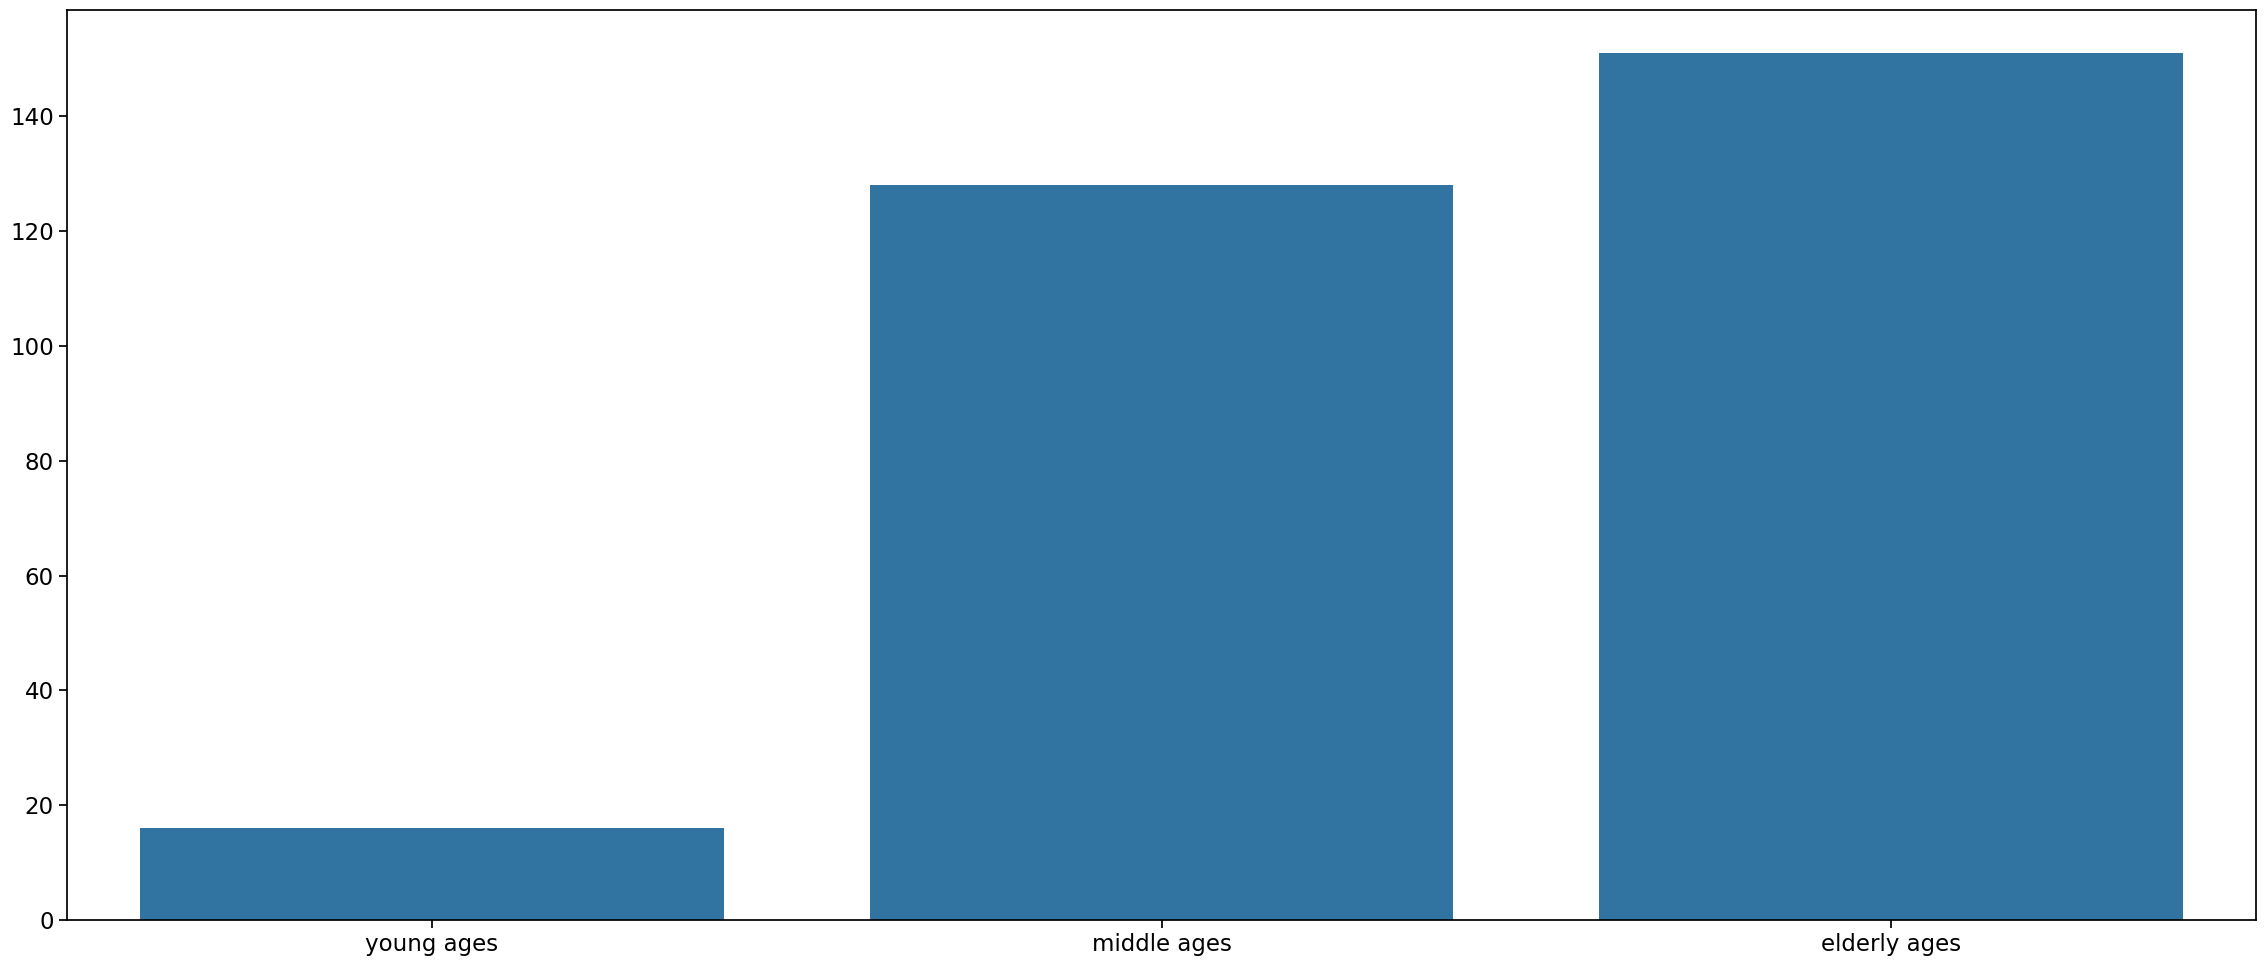

In [12]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

#### Inference: Here we can see that elder people are the most affected by heart disease and young ones are the least affected.

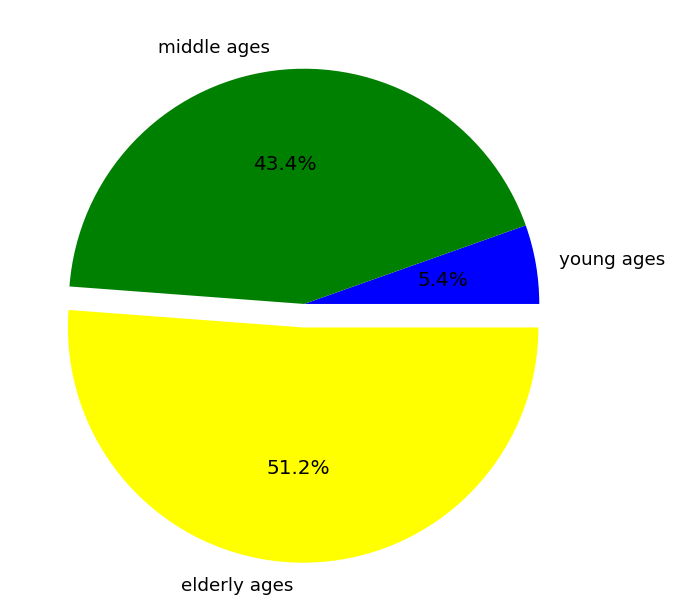

In [13]:
#To prove the above inference we will plot the pie chart.

colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(7,7))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

### Sex Feature Analysis

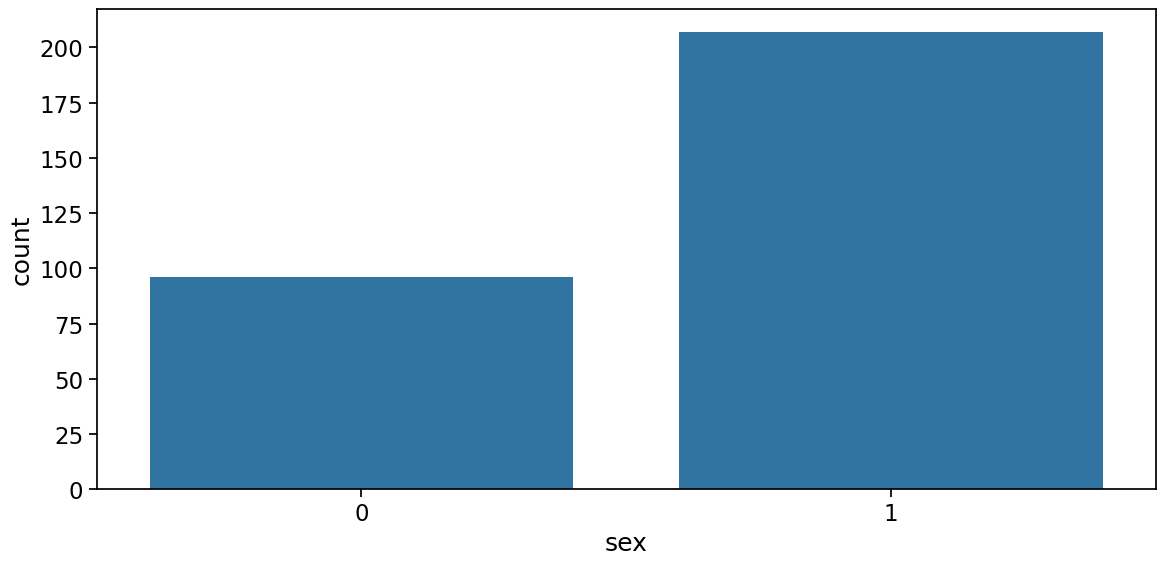

In [14]:
plt.figure(figsize=(12, 6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='sex', data=data)  # Use 'x' to specify the column name for the x-axis
plt.tight_layout()

#### Inference: Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

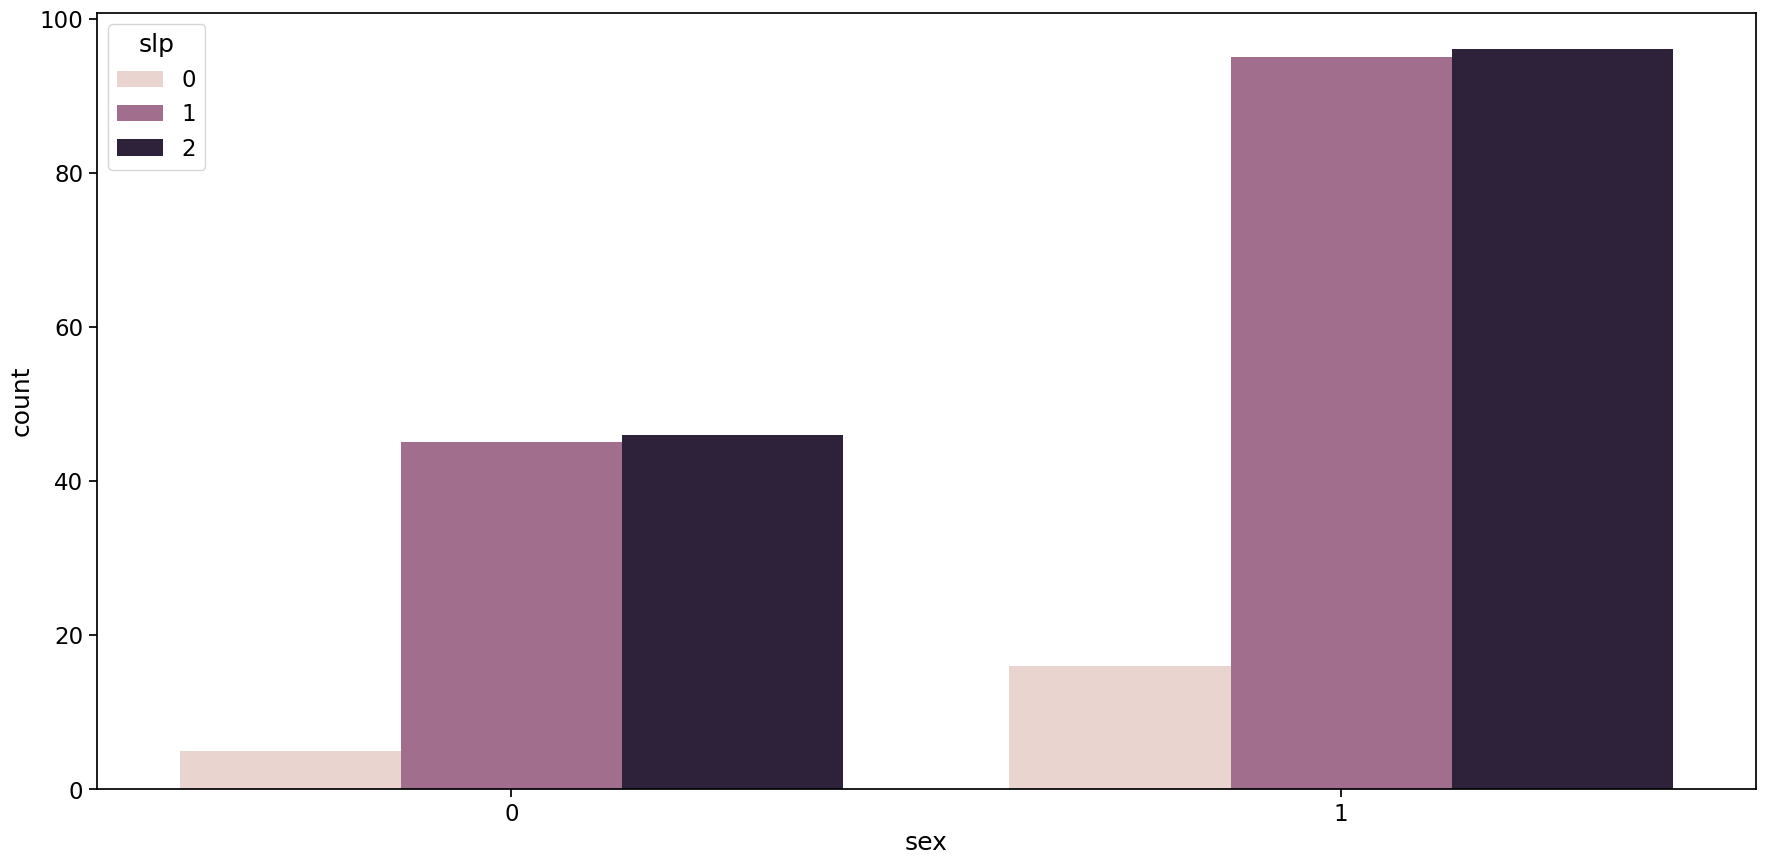

In [15]:
#Now let’s plot the relation between sex and slp.

plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(x='sex', hue='slp', data=data)  # Specify both 'x' and 'hue' variables
plt.tight_layout()

#### Inference: Here it is clearly visible that the slp value is higher in the case of males(1).

### Chest Pain Type(“cp”) Analysis

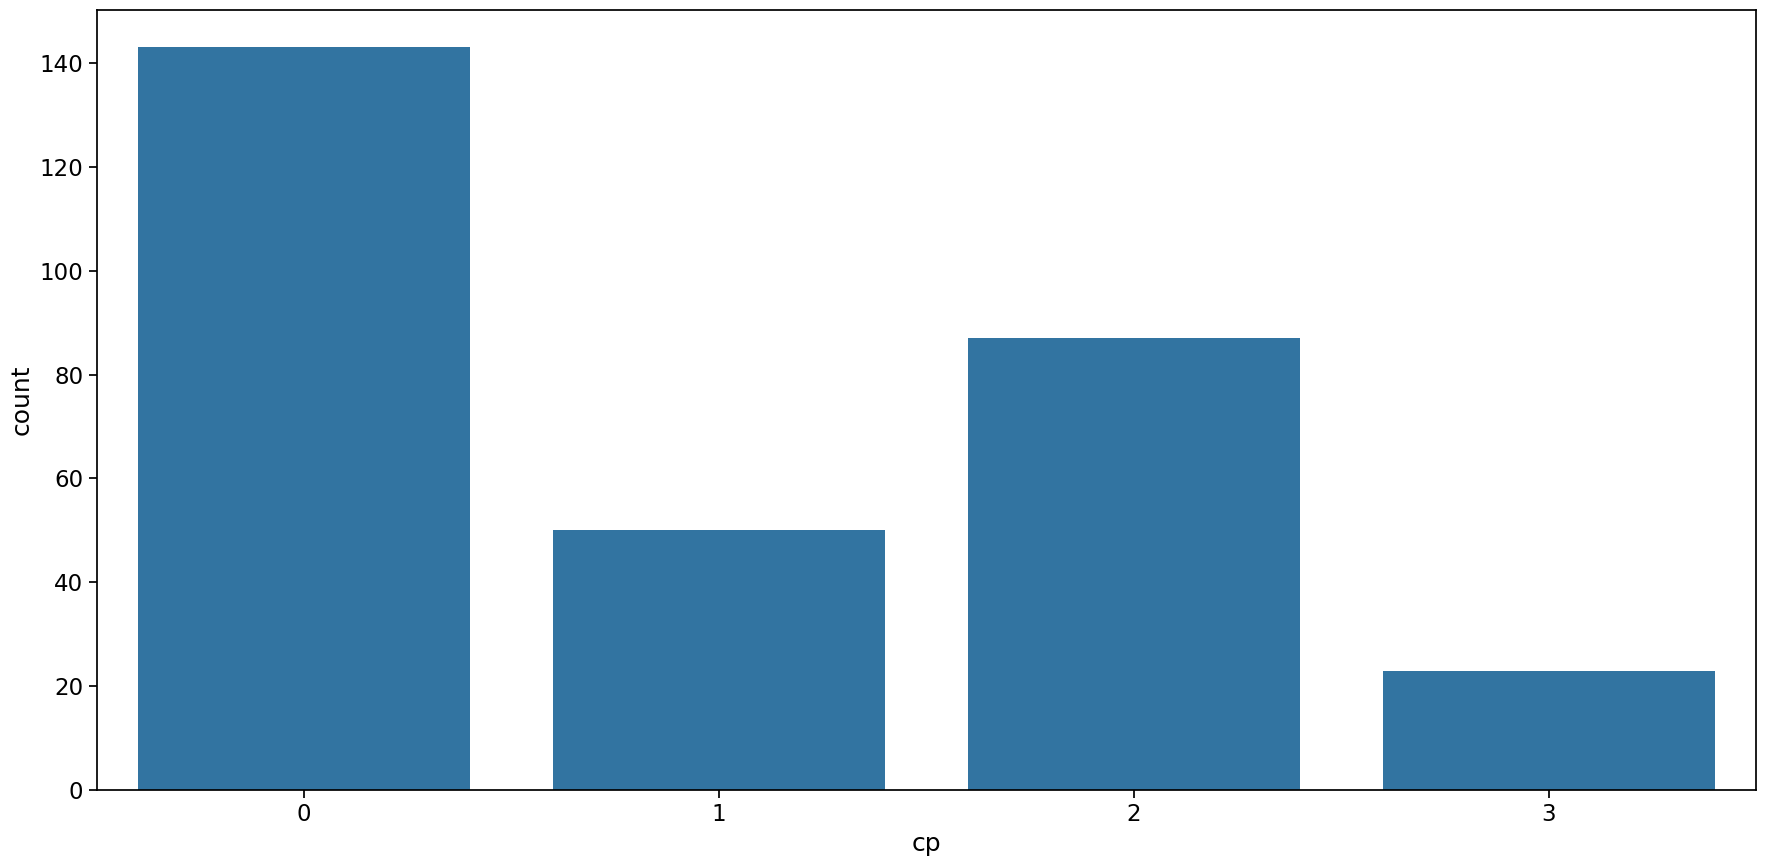

In [16]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=data, x='cp')  # Use 'x' to specify the column to be plotted
plt.tight_layout()

#### Inference: As seen, there are 4 types of chest pain

* status at least
* condition slightly distressed
* condition medium problem
* condition too bad

#### Analyzing cp vs target column

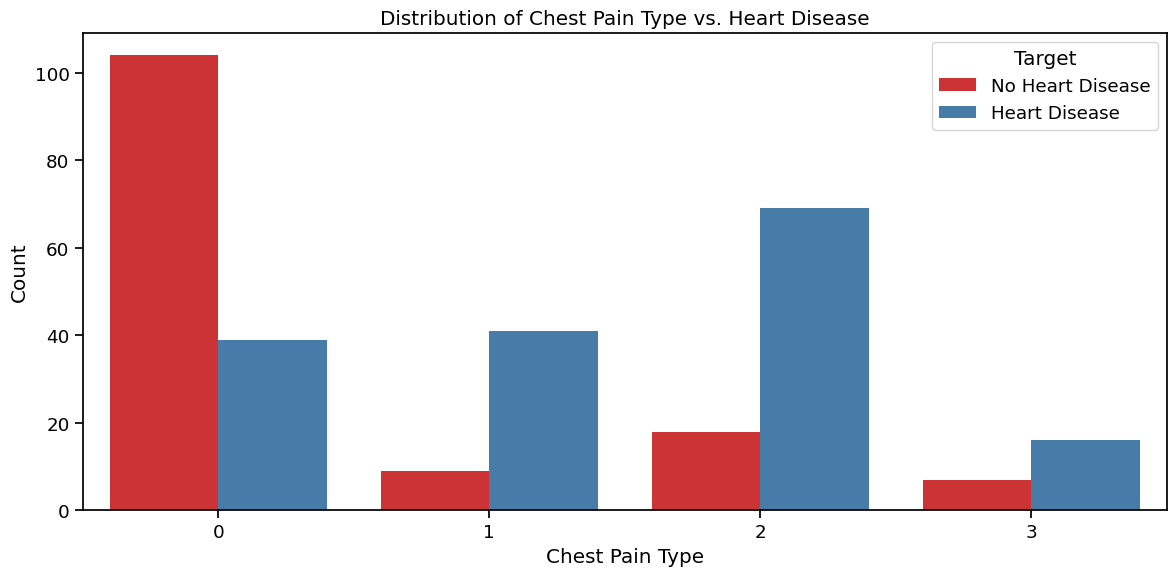

In [17]:
plt.figure(figsize=(12, 6))
sns.set_context('notebook', font_scale=1.2)
sns.countplot(data=data, x='cp', hue='output', palette='Set1')

# Set labels and title
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type vs. Heart Disease')

# Add a legend
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

#### Inference: From the above graph we can make some inferences,

* People having the least chest pain are not likely to have heart disease.
* People having severe chest pain are likely to have heart disease.

Elderly people are more likely to have chest pain.

### Thal Analysis

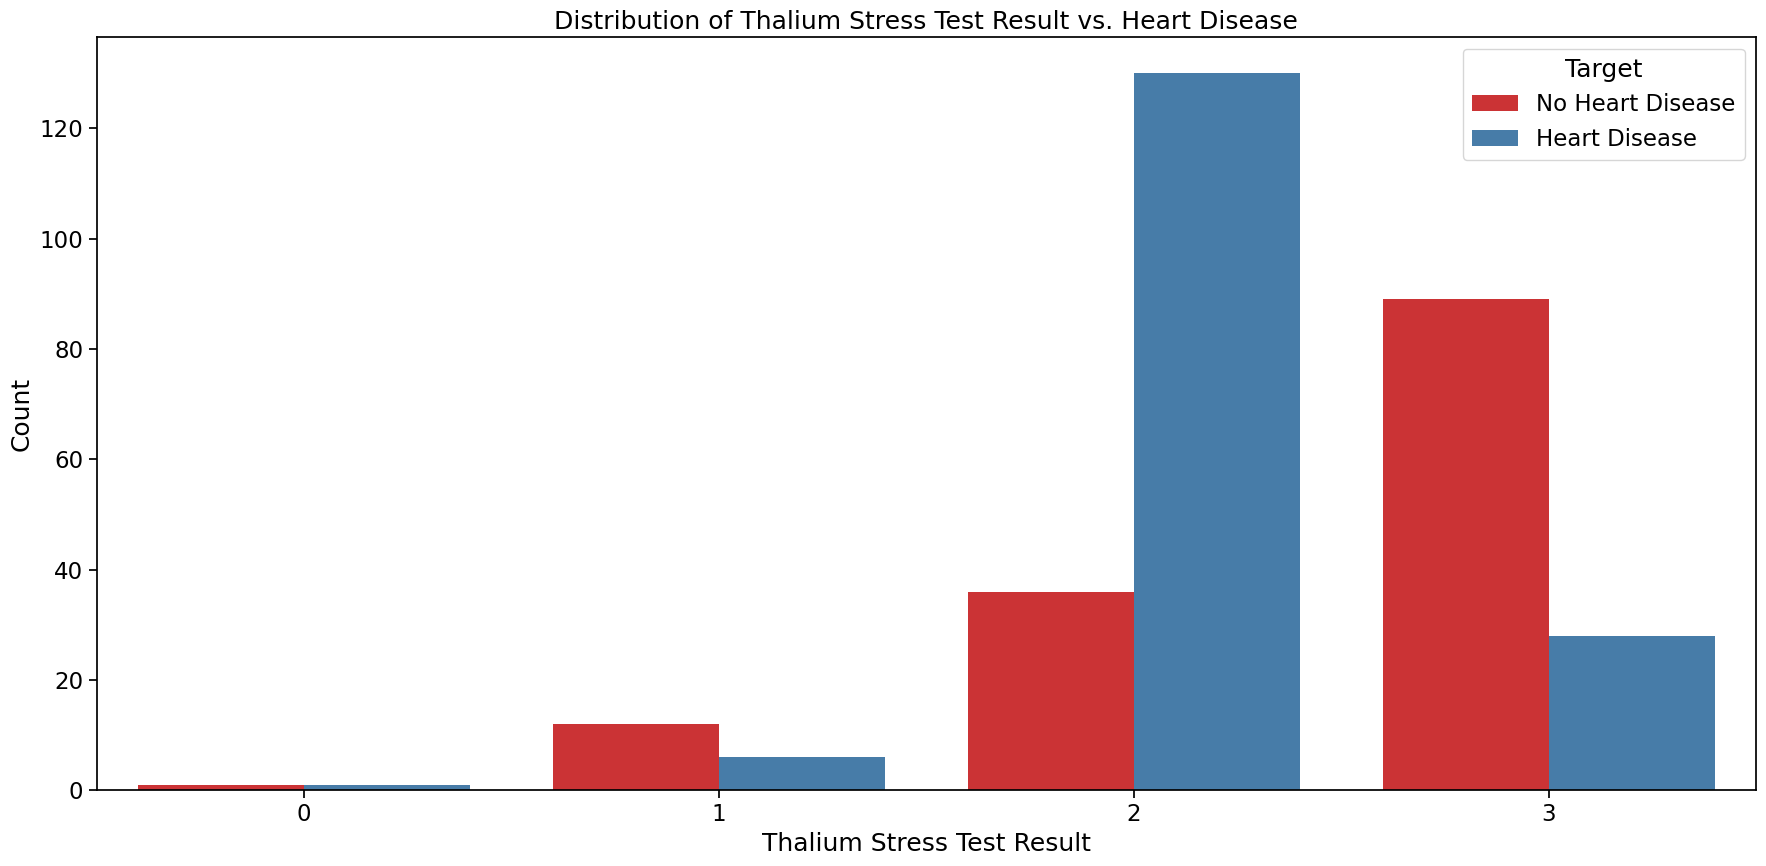

In [18]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=data, x='thall', hue='output', palette='Set1')

# Set labels and title
plt.xlabel('Thalium Stress Test Result')
plt.ylabel('Count')
plt.title('Distribution of Thalium Stress Test Result vs. Heart Disease')

# Add a legend
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

### Target

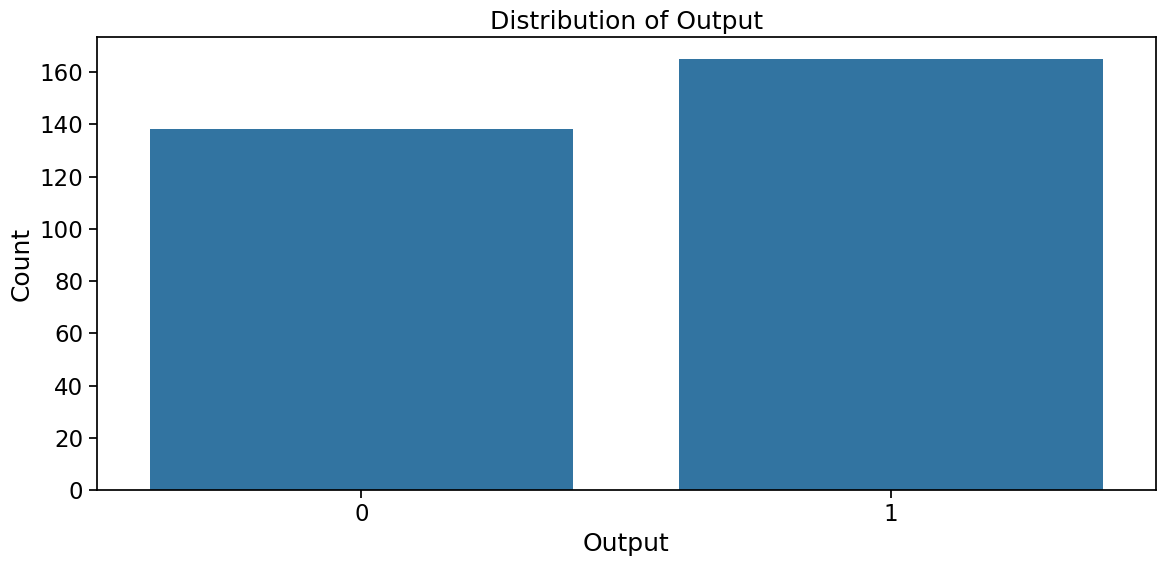

In [19]:
plt.figure(figsize=(12, 6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=data, x='output')

# Set labels and title
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Distribution of Output')

plt.tight_layout()
plt.show()

#### Inference: The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

In [20]:
x= data.iloc[:,0:13].values 
y= data['output'].values
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

Minimum error:- 0.13157894736842105 at K = 7


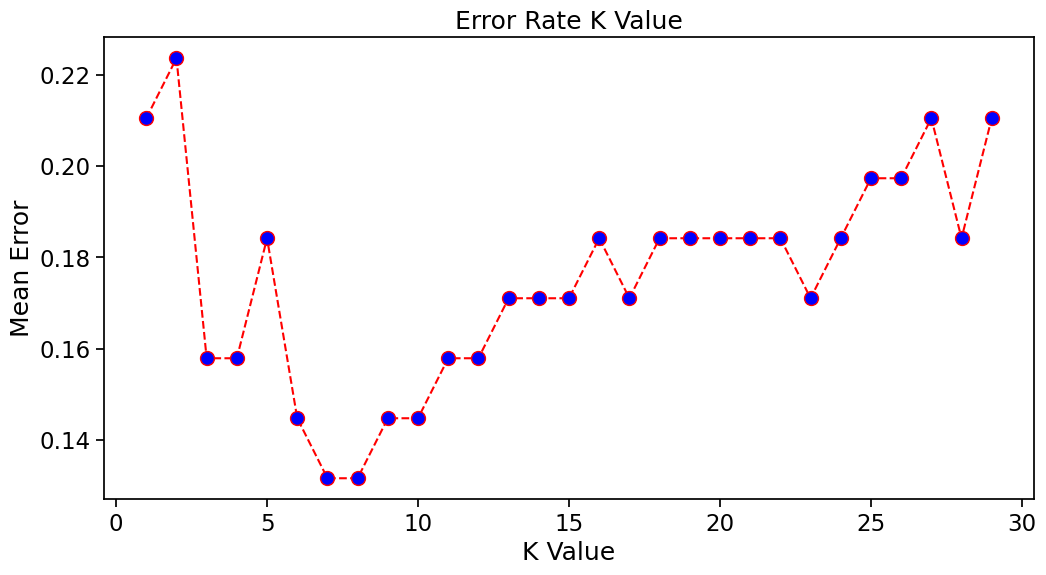

In [21]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [22]:
#Apply K-NN Algorithm:

classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
y_pred= classifier.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[26,  7],
       [ 3, 40]], dtype=int64)

In [26]:
#Accuracy:
accuracy_score(y_test, y_pred)

0.868421052631579

### Conclusion on Heart Disease Prediction

#### We got 86% accuracy on 25% of the dataset and this is a good sign. We could improve them by performing more hyperparameter tuning.